# Data Aggregation in Python with Pandas: Analysing Geological Lithology Data
## Exploring Lithology Variations within the Zechstein Group of the Norwegian Continental Shelf

Full article: https://medium.com/p/94192f5631c0



Using data aggregation techniques can help us transform an overwhelming and almost incomprehensible numeric dataset into something that is easily digestible and much more reader-friendly. The process of data aggregation involves summarising multiple data points into single metrics that can be used to provide a high-level overview of the data.

One way we can apply this process within petrophysics and geoscience is to summarise the lithological composition of geological formations that have been interpreted from well log measurements.

Within this short tutorial, we will see how we can take a large dataset consisting of 90 plus wells from the Norwegian Continental Shelf, and extract the lithology composition of the Zechstein Group.

## Importing Libraries and Loading Data
To begin, we first need to import the pandas library, which will be used to load our datafile from CSV and carry out the aggregations.

In [1]:
import pandas as pd

Once the pandas library has been imported, we can then read the CSV file using pd.read_csv().

The data we are going to be using is from the combined XEEK and Force 2020 Machine Learning competition which aimed to predict lithology from well log measurements. The dataset we are using represents all of the available training data. Further details of this dataset can be found at the end of the article.

As this CSV file contains data that is separated by a semi-colon rather than by a comma, we need to pass in a colon to the sep parameter.

In [2]:
# When running this cell, make sure the train.csv file has been unzipped in the data directory.

df = pd.read_csv('../data/Xeek Force 2020/train.csv', sep=';')

We can then run this code to begin the loading process. As we have a large dataset (11 million + rows), this may take several seconds. But, once it has finished loading, we can view our dataframe by calling upon the df object. This will return our dataframe and show the first five and last five rows from it.

In [3]:
df

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,...,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE
0,15/9-13,494.5280,437641.96875,6470972.5,-469.501831,NORDLAND GP.,NaN,19.480835,NaN,1.611410,...,34.636410,NaN,NaN,-0.574928,NaN,NaN,NaN,NaN,65000,1.0
1,15/9-13,494.6800,437641.96875,6470972.5,-469.653809,NORDLAND GP.,NaN,19.468800,NaN,1.618070,...,34.636410,NaN,NaN,-0.570188,NaN,NaN,NaN,NaN,65000,1.0
2,15/9-13,494.8320,437641.96875,6470972.5,-469.805786,NORDLAND GP.,NaN,19.468800,NaN,1.626459,...,34.779556,NaN,NaN,-0.574245,NaN,NaN,NaN,NaN,65000,1.0
3,15/9-13,494.9840,437641.96875,6470972.5,-469.957794,NORDLAND GP.,NaN,19.459282,NaN,1.621594,...,39.965164,NaN,NaN,-0.586315,NaN,NaN,NaN,NaN,65000,1.0
4,15/9-13,495.1360,437641.96875,6470972.5,-470.109772,NORDLAND GP.,NaN,19.453100,NaN,1.602679,...,57.483765,NaN,NaN,-0.597914,NaN,NaN,NaN,NaN,65000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1170506,7/1-2 S,3169.3124,NaN,NaN,NaN,VESTLAND GP.,Bryne Fm.,8.423170,NaN,NaN,...,27.674368,NaN,NaN,-0.001763,NaN,NaN,26.673708,NaN,30000,2.0
1170507,7/1-2 S,3169.4644,NaN,NaN,NaN,VESTLAND GP.,Bryne Fm.,8.379244,NaN,NaN,...,28.024338,NaN,NaN,-0.007600,NaN,NaN,26.840818,NaN,65030,2.0
1170508,7/1-2 S,3169.6164,NaN,NaN,NaN,VESTLAND GP.,Bryne Fm.,8.350248,NaN,NaN,...,28.091282,NaN,NaN,-0.018297,NaN,NaN,27.007942,NaN,65030,2.0
1170509,7/1-2 S,3169.7684,NaN,NaN,NaN,VESTLAND GP.,Bryne Fm.,8.313779,NaN,NaN,...,28.019775,NaN,NaN,-0.011438,NaN,NaN,27.175179,NaN,65030,2.0


## Using pandas .map() to Convert Numeric Codes to Lithology Strings
Within this dataset, the lithology data is stored within the FORCE_2020_LITHOFACIES_LITHOLOGY column. However, when we look closely at our data, we will see that the lithology values are encoded numerically. Unless you know the key, it will be hard to decipher what number represents what lithology.

Luckily for this dataset, we have the key and can create a dictionary with the key and lithology pairs.

In [4]:
lithology_numbers = {30000: 'Sandstone',
                 65030: 'Sandstone/Shale',
                 65000: 'Shale',
                 80000: 'Marl',
                 74000: 'Dolomite',
                 70000: 'Limestone',
                 70032: 'Chalk',
                 88000: 'Halite',
                 86000: 'Anhydrite',
                 99000: 'Tuff',
                 90000: 'Coal',
                 93000: 'Basement'}

To apply this to our dataset, we can use the pandas map() function, which will perform a lookup using our dictionary and then assign the correct lithology label to the numeric value.

In [5]:
df['LITH'] = df['FORCE_2020_LITHOFACIES_LITHOLOGY'].map(lithology_numbers)

Once this has run, we can view the dataframe again to make sure the mapping has been successful and a new LITH column has been added to the end of the dataframe.

In [6]:
df

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,...,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE,LITH
0,15/9-13,494.5280,437641.96875,6470972.5,-469.501831,NORDLAND GP.,NaN,19.480835,NaN,1.611410,...,NaN,NaN,-0.574928,NaN,NaN,NaN,NaN,65000,1.0,Shale
1,15/9-13,494.6800,437641.96875,6470972.5,-469.653809,NORDLAND GP.,NaN,19.468800,NaN,1.618070,...,NaN,NaN,-0.570188,NaN,NaN,NaN,NaN,65000,1.0,Shale
2,15/9-13,494.8320,437641.96875,6470972.5,-469.805786,NORDLAND GP.,NaN,19.468800,NaN,1.626459,...,NaN,NaN,-0.574245,NaN,NaN,NaN,NaN,65000,1.0,Shale
3,15/9-13,494.9840,437641.96875,6470972.5,-469.957794,NORDLAND GP.,NaN,19.459282,NaN,1.621594,...,NaN,NaN,-0.586315,NaN,NaN,NaN,NaN,65000,1.0,Shale
4,15/9-13,495.1360,437641.96875,6470972.5,-470.109772,NORDLAND GP.,NaN,19.453100,NaN,1.602679,...,NaN,NaN,-0.597914,NaN,NaN,NaN,NaN,65000,1.0,Shale
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1170506,7/1-2 S,3169.3124,NaN,NaN,NaN,VESTLAND GP.,Bryne Fm.,8.423170,NaN,NaN,...,NaN,NaN,-0.001763,NaN,NaN,26.673708,NaN,30000,2.0,Sandstone
1170507,7/1-2 S,3169.4644,NaN,NaN,NaN,VESTLAND GP.,Bryne Fm.,8.379244,NaN,NaN,...,NaN,NaN,-0.007600,NaN,NaN,26.840818,NaN,65030,2.0,Sandstone/Shale
1170508,7/1-2 S,3169.6164,NaN,NaN,NaN,VESTLAND GP.,Bryne Fm.,8.350248,NaN,NaN,...,NaN,NaN,-0.018297,NaN,NaN,27.007942,NaN,65030,2.0,Sandstone/Shale
1170509,7/1-2 S,3169.7684,NaN,NaN,NaN,VESTLAND GP.,Bryne Fm.,8.313779,NaN,NaN,...,NaN,NaN,-0.011438,NaN,NaN,27.175179,NaN,65030,2.0,Sandstone/Shale


## Filtering the Dataframe for a Specific Geological Group
As we have a rather large dataset with 11,705,511 rows, it would be good to focus on a particular geological group for our lithology compositional analysis.

In this case, we will subset the data and look at the Zechstein Group.

We can do this by using the query() method and passing in a simple string: GROUP == "ZECHSTEIN GP."

In [7]:
df_zechstein = df.query('GROUP == "ZECHSTEIN GP."')
df_zechstein.WELL.unique()

array(['15/9-13', '16/1-2', '16/10-1', '16/11-1 ST3', '16/2-16', '16/2-6',
       '16/4-1', '17/11-1'], dtype=object)

We can check how many wells we have in the subset by calling upon df_zechstein.WELL.unique(), which returns the following array containing 8 wells.

As we are only interested in the lithologies, we can simply extract the Well name and the lithology columns. This will also make it easier to carry out the aggregation.

In [8]:
df_zechstein_liths = df_zechstein[['WELL', 'LITH']]

In [9]:
df_zechstein_liths

,WELL,LITH
18164,15/9-13,Shale
18165,15/9-13,Shale
18166,15/9-13,Shale
18167,15/9-13,Shale
18168,15/9-13,Shale
...,...,...
211818,17/11-1,Halite
211819,17/11-1,Halite
211820,17/11-1,Halite
211821,17/11-1,Halite


## Aggregating the Data Using Chained Pandas Functions
Now that we have the data in a format that can be worked with we can begin the aggregation process. For this, we are going to chain multiple pandas methods together in a single.

First, we will group the data by the WELL column using the groupby function. This essentially makes subsets of the dataframe for each unique well name within the WELL column

Next, we will count the occurrences of each lithology type within each group. The normalize=True part means it will give a proportion (between 0 and 1) rather than absolute counts. For example, if in one well (group), 'Sandstone' occurs 5 times and 'Shale' occurs 15 times, the function will return 0.25 for 'Sandstone' and 0.75 for 'Shale' instead of 5 and 15.

Finally, we need to rearrange our resulting dataframe so that the row index contains the well names and the columns contain the lithology names. If a well did not have any instances of a certain lithology then they are filled with zero, due to fill_value=0.

In [10]:
summary_df = df_zechstein_liths.groupby('WELL').value_counts(normalize=True).unstack(fill_value=0)

What we get back is the following dataframe with the decimal proportions of each lithology within each of the wells.

In [11]:
summary_df

LITH,Anhydrite,Dolomite,Halite,Limestone,Marl,Sandstone,Sandstone/Shale,Shale
WELL,,,,,,,,
15/9-13,0.160377,0.386792,0.000000,0.000000,0.000000,0.000000,0.000000,0.452830
16/1-2,0.000000,0.068800,0.000000,0.425600,0.198400,0.035200,0.000000,0.272000
16/10-1,0.000000,0.000000,0.276923,0.000000,0.000000,0.000000,0.000000,0.723077
16/11-1 ST3,0.061371,0.001306,0.934494,0.000000,0.000000,0.000000,0.000000,0.002829
16/2-16,0.113982,0.000000,0.000000,0.503040,0.174772,0.016717,0.133739,0.057751
16/2-6,0.000000,0.226006,0.000000,0.291022,0.000000,0.089783,0.195046,0.198142
16/4-1,0.384248,0.160700,0.000000,0.009547,0.000000,0.002387,0.000000,0.443119
17/11-1,0.042309,0.005858,0.845954,0.000000,0.000000,0.000000,0.000000,0.105880


If we want to view these as percentages, we can change how they are displayed using the following code:

In [12]:
summary_df.style.format('{:.2%}')

LITH,Anhydrite,Dolomite,Halite,Limestone,Marl,Sandstone,Sandstone/Shale,Shale
WELL,,,,,,,,
15/9-13,16.04%,38.68%,0.00%,0.00%,0.00%,0.00%,0.00%,45.28%
16/1-2,0.00%,6.88%,0.00%,42.56%,19.84%,3.52%,0.00%,27.20%
16/10-1,0.00%,0.00%,27.69%,0.00%,0.00%,0.00%,0.00%,72.31%
16/11-1 ST3,6.14%,0.13%,93.45%,0.00%,0.00%,0.00%,0.00%,0.28%
16/2-16,11.40%,0.00%,0.00%,50.30%,17.48%,1.67%,13.37%,5.78%
16/2-6,0.00%,22.60%,0.00%,29.10%,0.00%,8.98%,19.50%,19.81%
16/4-1,38.42%,16.07%,0.00%,0.95%,0.00%,0.24%,0.00%,44.31%
17/11-1,4.23%,0.59%,84.60%,0.00%,0.00%,0.00%,0.00%,10.59%


Applying this styling does not change the actual values. They will still be stored as their decimal equivalents.

If we do want to change the values permanently to percentages, we can do so by multiplying the dataframe by 100.

In [13]:
summary_df = summary_df * 100
summary_df

LITH,Anhydrite,Dolomite,Halite,Limestone,Marl,Sandstone,Sandstone/Shale,Shale
WELL,,,,,,,,
15/9-13,16.037736,38.679245,0.000000,0.000000,0.000000,0.000000,0.000000,45.283019
16/1-2,0.000000,6.880000,0.000000,42.560000,19.840000,3.520000,0.000000,27.200000
16/10-1,0.000000,0.000000,27.692308,0.000000,0.000000,0.000000,0.000000,72.307692
16/11-1 ST3,6.137106,0.130577,93.449402,0.000000,0.000000,0.000000,0.000000,0.282916
16/2-16,11.398176,0.000000,0.000000,50.303951,17.477204,1.671733,13.373860,5.775076
16/2-6,0.000000,22.600619,0.000000,29.102167,0.000000,8.978328,19.504644,19.814241
16/4-1,38.424821,16.070008,0.000000,0.954654,0.000000,0.238663,0.000000,44.311854
17/11-1,4.230853,0.585810,84.595357,0.000000,0.000000,0.000000,0.000000,10.587980


Once the data is in this format, we can use it to create something similar to the infographic below, which shows the percentages for the lithologies for each of the wells.

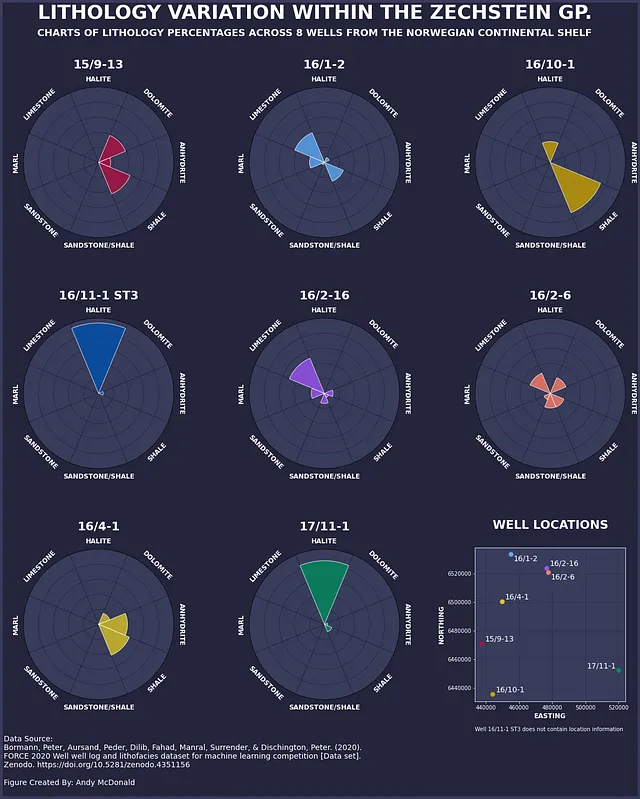

## Summary
Within this short tutorial, we have seen how we can take a large collection of well log data (from 90 plus wells) and extract and summarise a particular geological group. This allows us to understand the lithological composition of the geological group in an easy-to-read and understandable format that can be incorporated into a report or presentation.

## Dataset Used in this Tutorial
Training dataset used as part of a Machine Learning competition run by Xeek and FORCE 2020 (Bormann et al., 2020). This dataset is licensed under Creative Commons Attribution 4.0 International.

The full dataset can be accessed at the following link: https://doi.org/10.5281/zenodo.4351155.



In [14]:
summary_df.to_csv('Data/Xeek Force 2020/zechstein_gp_lith_summary.csv')